<a href="https://colab.research.google.com/github/madhhuurrii/ECOHACKS/blob/master/Plantect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Image* *Upload*

In [51]:
from google.colab import files
  
image = files.upload()

Saving Potato-leaf-blight.webp to Potato-leaf-blight.webp


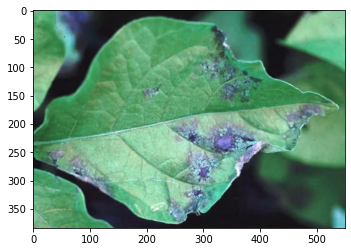

In [53]:
img = cv2.imread('Potato-leaf-blight.webp')
plt.imshow(img)
plt.show()

**Importing Libraries**

In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


***Image Pre-processing***

 1. *Here we try to convert the uploaded image to RGB from BGR format*

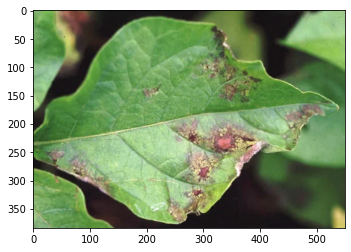

In [55]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

2. *Covert RGB format image to HSV format*

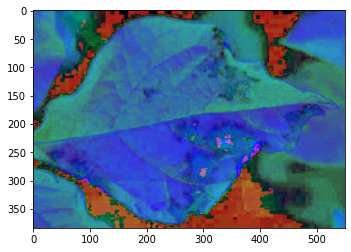

In [56]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

**Image Segmentation**

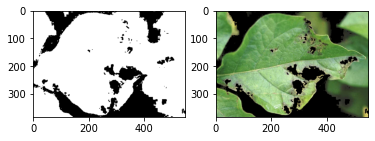

In [57]:
# Extraction of green color
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

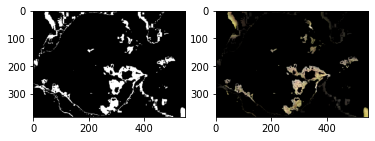

In [58]:
# Extraction of Brown color
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

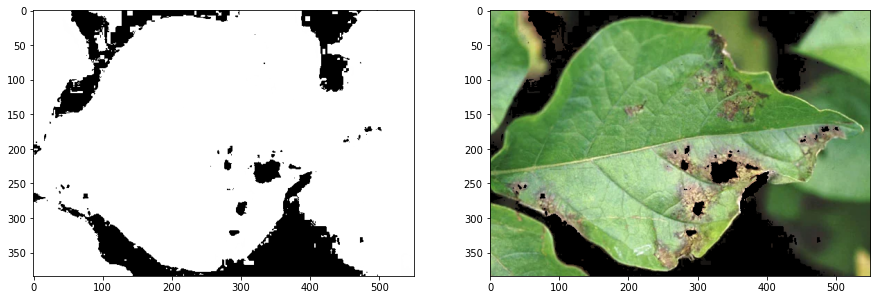

In [59]:
# Both Brown and Green
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

To get color moment feature set following steps are executed
 The RGB images is preprocessed .
 The image is converted into HSV Component.
 Histogram equalization is done for three component
 Calculate first , second & third order moment for the three
components’ histogram respectively.
 Steps 1 & 4 are executed for all images.

In [62]:
H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

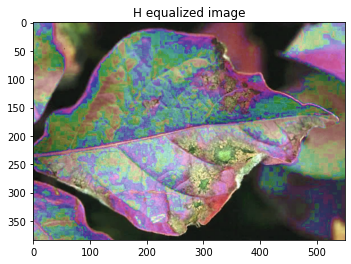

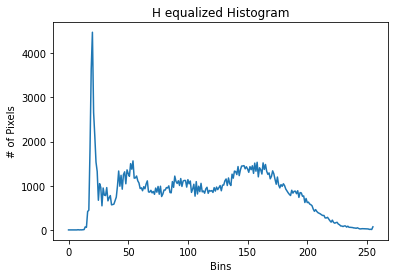

In [63]:
eq_H = cv2.equalizeHist(H)
eq_image = cv2.cvtColor(cv2.merge([eq_H, S, V]),cv2.COLOR_HSV2RGB)
hist = cv2.calcHist([eq_image], [0], None, [256], [0, 256])
plt.imshow(eq_image)
plt.title("H equalized image")
plt.show()
plt.title("H equalized Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)

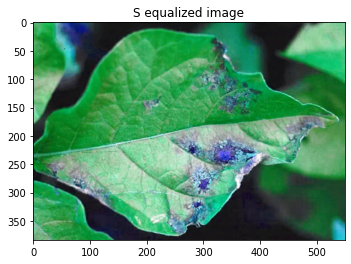

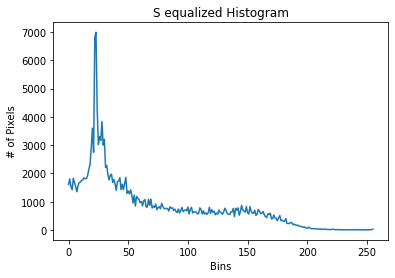

In [64]:
eq_S = cv2.equalizeHist(S)
eq_image = cv2.cvtColor(cv2.merge([H, eq_S, V]),cv2.COLOR_HSV2RGB)
hist = cv2.calcHist([eq_image], [0], None, [256], [0, 256])
plt.imshow(eq_image)
plt.title("S equalized image")
plt.show()
plt.title("S equalized Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)

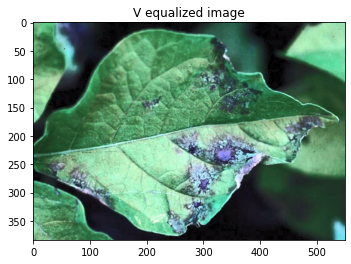

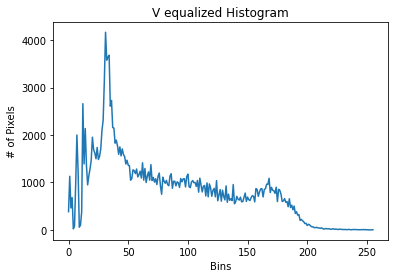

In [65]:

eq_V = cv2.equalizeHist(V)
eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]),cv2.COLOR_HSV2RGB)
hist = cv2.calcHist([eq_image], [0], None, [256], [0, 256])
plt.imshow(eq_image)
plt.title("V equalized image")
plt.show()
plt.title("V equalized Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)

(0.0, 256.0)

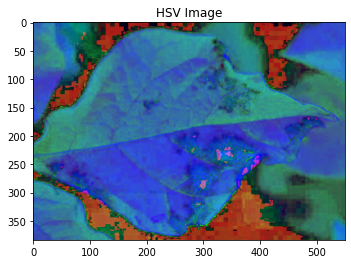

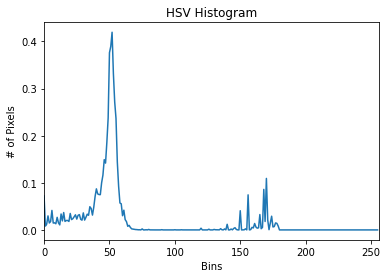

In [66]:
# Feature Extraction of image by converting RGB to HSV format and then obtaining colorful Histogram
# bgr_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# # cv2.imshow("gray", gray)
plt.title("HSV Image")
plt.imshow(hsv_img)

hist = cv2.calcHist([hsv_img], [0], None, [256], [0, 256])
cv2.normalize(hist, hist)
plt.figure()
plt.title("HSV Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])